Studi kasus regresi non linear china GDP

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
path='china_gdp.csv'
df = pd.read_csv(path)
df.head(10)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


Ploting dataset 

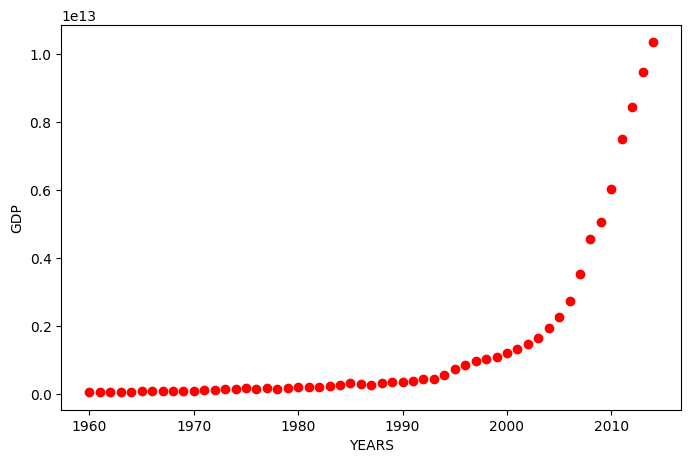

In [56]:
plt.figure(figsize=(8,5))
x_data,y_data =(df["Year"].values,df["Value"].values)
plt.plot(x_data,y_data,"ro")
plt.ylabel("GDP")
plt.xlabel("YEARS")
plt.show()

Memilih model yang cocok dengan dataset(?)

Membuat Model (Sigmoidal/Logistic)

In [57]:
# membuat model
def model_sigmoid(x,beta_1,beta_2):
    return 1/(1+np.exp(-beta_1* (x-beta_2)))

Testing model

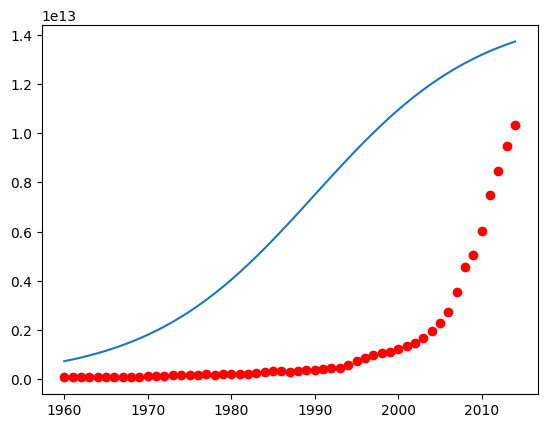

In [58]:
beta_1 = 0.1
beta_2 = 1990.0

y_prediksi = model_sigmoid(x_data,beta_1,beta_2)

plt.plot(x_data,y_data,"ro")
plt.plot(x_data,y_prediksi*15000000000000.)

Normalisasi data

In [59]:
x_data_scaled = (x_data-min(x_data))/(max(x_data)-min(x_data))
y_data_scaled = (y_data-min(y_data))/(max(y_data)-min(y_data))

Menentukan nilai beta_1 dan beta_2

In [64]:
from scipy.optimize import curve_fit
popt,pcov= curve_fit(model_sigmoid,x_data_scaled,y_data_scaled)
# print(f"beta_1 {popt[0]}")
# print(f"beta_2 {popt[1]}")


hitung y prediksi

In [65]:
y_prediksi = model_sigmoid(x_data_scaled, *popt)

Plot Hasil Regresi Non Linier

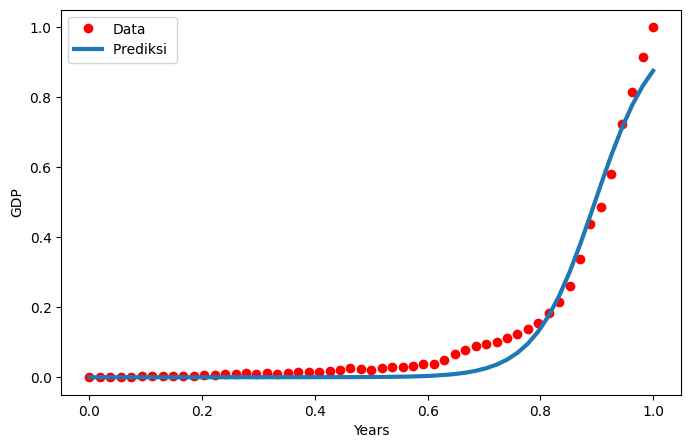

In [66]:

plt.figure(figsize=(8,5))
plt.plot(x_data_scaled,y_data_scaled,'ro', label='Data')
plt.plot(x_data_scaled,y_prediksi,linewidth=3.0,label= 'Prediksi ')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Years')
plt.show()